In [1]:
#gerekli kutuphaneler ice aktarildi
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os
os.listdir('../ebrar_010160608/input')

['B3.tif', 'B5.tif']

In [3]:
band3 = rasterio.open('../ebrar_010160608/input/B3.tif') #green
band5 = rasterio.open('../ebrar_010160608/input/B5.tif') #nir

In [4]:
#satir numaralari
band3.height

1485

In [5]:
#sutun numaralari 
band3.width

1485

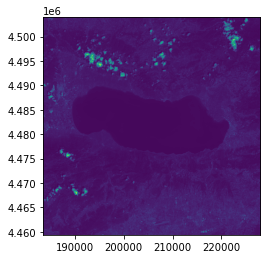

<AxesSubplot:>

In [6]:
#plot
plot.show(band3)

In [7]:
band3.dtypes[0]

'uint16'

In [8]:
#referans sistemi
band3.crs

CRS.from_epsg(32636)

In [9]:
#donusum parametreleri
band3.transform

Affine(30.0, 0.0, 183435.0,
       0.0, -30.0, 4503945.0)

In [10]:
#raster degerleri"matrix dizisi"
band3.read(1)

array([[11031, 10688, 10592, ...,  9590,  9692,  9722],
       [10677, 10298, 11045, ...,  9492,  9270,  9435],
       [11018, 10633, 10905, ...,  9371,  9042,  9080],
       ...,
       [10332, 10028, 10450, ...,  9781,  9845, 10136],
       [ 9594, 10106, 10986, ..., 10324, 10159,  9925],
       [ 9859,  9941, 10944, ..., 10398, 10492, 10286]], dtype=uint16)

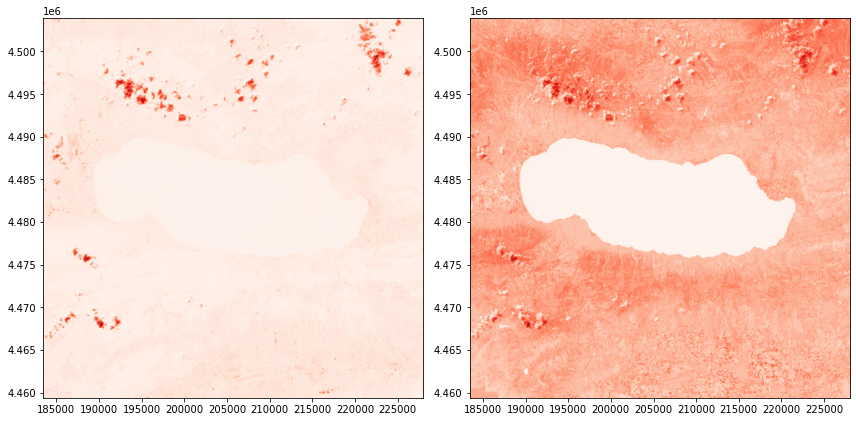

In [11]:
#band gosterim
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band3, ax=ax1, cmap='Reds') #green
plot.show(band5, ax=ax2, cmap='Reds') #nir
fig.tight_layout()

In [12]:
#nir ve yesil objeler
green = band3.read(1).astype('float64')
nir = band5.read(1).astype('float64')

In [13]:
nir

array([[20310., 20472., 21184., ..., 25112., 23011., 22237.],
       [19959., 20657., 22418., ..., 26087., 25653., 25864.],
       [22728., 21972., 23425., ..., 26549., 27783., 30121.],
       ...,
       [20332., 21023., 21297., ..., 18953., 19788., 19351.],
       [22729., 23157., 22040., ..., 20877., 21126., 20209.],
       [19464., 22008., 21408., ..., 19740., 20030., 20089.]])

In [14]:
#ndwi hesaplama islemi yapildi formul tanimlandi su pikselleri ayristirildi
ndwi=np.where(
    (green+nir)==0., 
    0, 
    (green-nir)/(green+nir))
ndwi[:5,:5]

array([[-0.29606586, -0.3139923 , -0.33333333, -0.38872281, -0.3317548 ],
       [-0.30297689, -0.33464707, -0.33986791, -0.32818153, -0.24442022],
       [-0.34700409, -0.34776875, -0.3646956 , -0.24877515, -0.32948973],
       [-0.37159599, -0.31521251, -0.29549784, -0.32437906, -0.39440125],
       [-0.30640438, -0.25711783, -0.33315088, -0.37931442, -0.36299939]])

In [15]:
#ndwi export islemi
ndwi_ebrar_010160608 = rasterio.open('../ebrar_010160608/output/ndwi_ebrar_010160608.tiff','w',driver='Gtiff',
                          width=band3.width, 
                          height = band3.height, 
                          count=1, crs=band3.crs, 
                          transform=band3.transform, 
                          dtype='float64')

In [16]:
ndwi_ebrar_010160608.write(ndwi,1)
ndwi_ebrar_010160608.close()

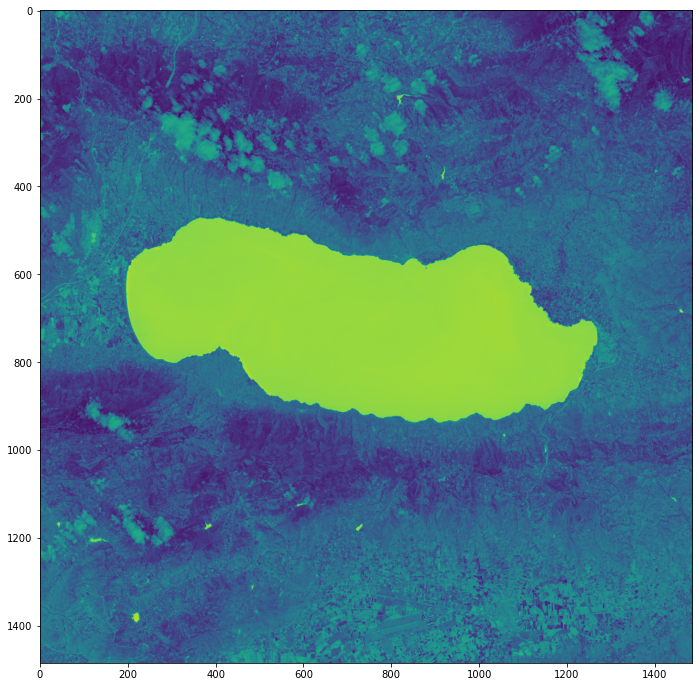

<AxesSubplot:>

In [17]:
#ndwi plot
ndwi_ebrar_010160608 = rasterio.open('../ebrar_010160608/output/ndwi_ebrar_010160608.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndwi)